### Which Classifiers have better performances?
We can make another comparison of the results for evaluating the ranking of each classifier based on the maximum performance of  500 runs on each dataset. For example, Adaboost has the best maximum result on 53 datasets and SVM has rated worst for 103 datasets. Also, these result reported for 3 different accuracy (exact value, with two decimal place and with no decimal place)

In [1]:
from scipy.stats import wilcoxon
import scipy.stats as ss
import math
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
warnings.filterwarnings('ignore')
%matplotlib inline
font = {
        # 'family' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

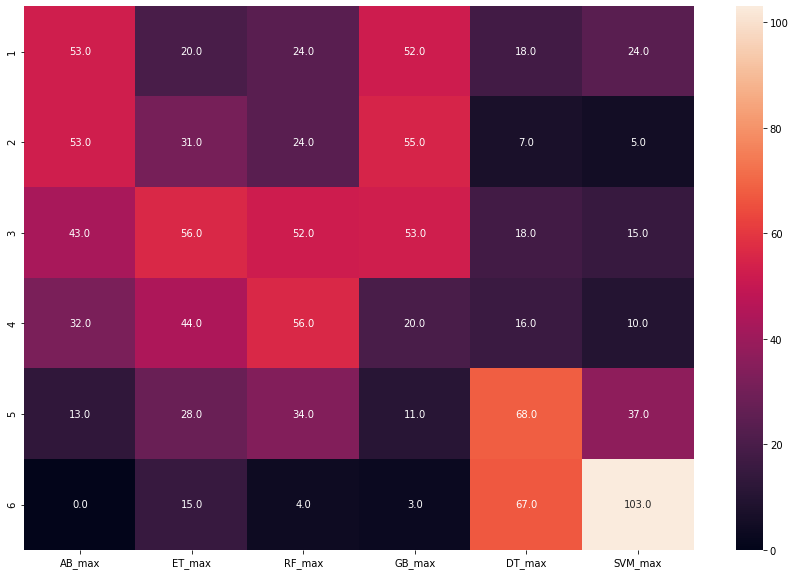

In [2]:
df=pd.read_csv('../output_csv/cls_statistic.csv')
model_list=["AB_max","ET_max","RF_max","GB_max","DT_max","SVM_max"]
df_max=df[model_list]
df_max=df_max*100
df_rank=df_max.copy()
for index, row in df_max.iterrows():
    df_rank.loc[index]=len(row) - (ss.rankdata(row)).round()+1
    
df_out=pd.DataFrame(columns=["AB_max","ET_max","RF_max","GB_max","DT_max","SVM_max"],index=[1,2,3,4,5,6])
for index,row in df_out.iterrows():
    for column in df_out.columns:
        out=df_rank[df_rank[column]==index].count()
        df_out.loc[index,column]=out[0]



plt.figure(figsize=(15,10))
# plt.title("Exact value")
ax=sns.heatmap(df_out.astype(float),annot=True,fmt=".1f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);
plt.savefig("../output_plots/classifiers_ranks.pdf" ,bbox_inches = 'tight',pad_inches = 0, format='pdf')

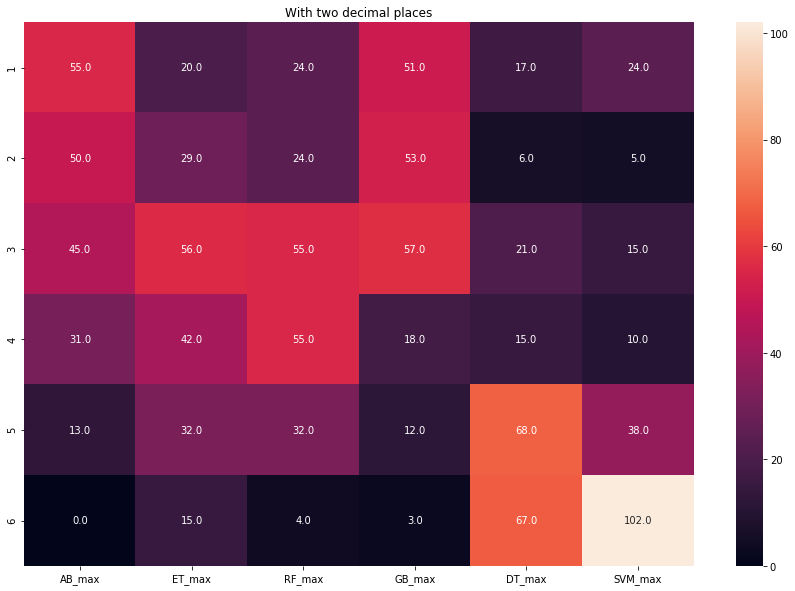

In [3]:
df=pd.read_csv('../output_csv/cls_statistic.csv')
model_list=["AB_max","ET_max","RF_max","GB_max","DT_max","SVM_max"]
df_max=df[model_list]
df_max=df_max*100
df_max=df_max.round(2)



df_rank=df_max.copy()
for index, row in df_max.iterrows():
    df_rank.loc[index]=len(row) - (ss.rankdata(row)).round()+1
    
    
df_out=pd.DataFrame(columns=["AB_max","ET_max","RF_max","GB_max","DT_max","SVM_max"],index=[1,2,3,4,5,6])
for index,row in df_out.iterrows():
    for column in df_out.columns:
        out=df_rank[df_rank[column]==index].count()
        df_out.loc[index,column]=out[0]

        
      
plt.figure(figsize=(15,10))
plt.title("With two decimal places")
ax=sns.heatmap(df_out.astype(float),annot=True,fmt=".1f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

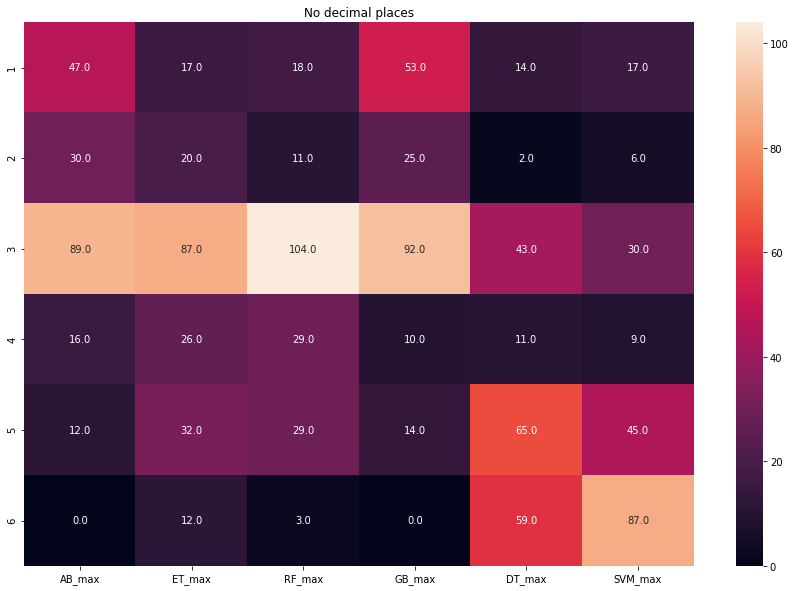

In [4]:
df=pd.read_csv('../output_csv/cls_statistic.csv')
model_list=["AB_max","ET_max","RF_max","GB_max","DT_max","SVM_max"]
df_max=df[model_list]
df_max=df_max*100
df_max=df_max.round(0)


df_rank=df_max.copy()
for index, row in df_max.iterrows():
    df_rank.loc[index]=len(row) - (ss.rankdata(row)).round()+1

    
    
df_out=pd.DataFrame(columns=["AB_max","ET_max","RF_max","GB_max","DT_max","SVM_max"],index=[1,2,3,4,5,6])
for index,row in df_out.iterrows():
    for column in df_out.columns:
        out=df_rank[df_rank[column]==index].count()
        df_out.loc[index,column]=out[0]

        
plt.figure(figsize=(15,10))
plt.title("No decimal places")
ax=sns.heatmap(df_out.astype(float),annot=True,fmt=".1f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);